# Imports
 paths based on my downloaded items in my Google Drive

In [1]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/mimic-iv-ed-2.2/ed')

In [3]:
import numpy as np
import pandas as pd

In [18]:
import importlib
import mlp
import attack
import preprocess
importlib.reload(mlp)
importlib.reload(preprocess)
importlib.reload(attack)
from mlp import *
from preprocess import *
from attack import *

# Data
MIMIC-EV-Data tables merged and preprocessed for MLP training (everything done in preprocess.py)

In [14]:
# Preprocess MIMIC-IV-ED Data so that it can be used for model training
df = preprocess_data()

In [15]:
pd.set_option('display.max_columns', None)
df.head()

,subject_id,stay_id,gender,race,arrival_transport,disposition,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,seq_num,icd_version,etc_rn,totaltime,chiefcomplaint_abdpain,chiefcomplaint_abnormallabs,chiefcomplaint_alteredmentalstatus,chiefcomplaint_backpain,chiefcomplaint_brbpr,chiefcomplaint_chestpain,"chiefcomplaint_chestpain,dyspnea",chiefcomplaint_dizziness,chiefcomplaint_dyspnea,chiefcomplaint_fever,chiefcomplaint_headache,chiefcomplaint_lowerbackpain,chiefcomplaint_n/v,chiefcomplaint_n/v/d,chiefcomplaint_s/pfall,chiefcomplaint_si,chiefcomplaint_sob,chiefcomplaint_syncope,chiefcomplaint_weakness,chiefcomplaint_woundeval,icd_code_25000,icd_code_2720,icd_code_4019,icd_code_4280,icd_code_486,icd_code_5990,icd_code_7242,icd_code_78060,icd_code_78650,icd_code_78909,icd_code_E119,icd_code_E8889,icd_code_I10,icd_code_M545,icd_code_R0600,icd_code_R079,icd_code_R109,icd_code_R531,icd_code_V5867,icd_code_Z794,etccode_156.0,etccode_250.0,etccode_290.0,etccode_301.0,etccode_414.0,etccode_445.0,etccode_523.0,etccode_575.0,etccode_577.0,etccode_670.0,etccode_701.0,etccode_2683.0,etccode_3510.0,etccode_3948.0,etccode_4609.0,etccode_5843.0,etccode_5904.0,etccode_5970.0,etccode_6094.0,etccode_6615.0,gsn_2173.0,gsn_2532.0,gsn_3009.0,gsn_3757.0,gsn_4376.0,gsn_4380.0,gsn_4490.0,gsn_4560.0,gsn_6373.0,gsn_8208.0,gsn_13318.0,gsn_16927.0,gsn_16995.0,gsn_18368.0,gsn_18698.0,gsn_22159.0,gsn_27462.0,gsn_28090.0,gsn_33530.0,gsn_47780.0,ndc_10003011501.0,ndc_10003011602.0,ndc_10135011101.0,ndc_10135015001.0,ndc_10135017301.0,ndc_10135024036.0,ndc_10135052603.0,ndc_10544013130.0,ndc_10544034130.0,ndc_10544045530.0,ndc_10585086504.0,ndc_11845014770.0,ndc_11845015001.0,ndc_12280027016.0,ndc_13668009705.0,ndc_16590005828.0,ndc_16590031330.0,ndc_21695042308.0,ndc_45802064287.0,ndc_49999099410.0
251,10000635,31767754,0,1,4,1,-0.306456,-1.569395,-0.758650,0.200346,-0.095139,-0.110565,0,2.0,2.0,0,1.0,-0.424933,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
256,10000635,31767754,0,1,4,1,-0.306456,-1.569395,-0.758650,0.200346,-0.095139,-0.110565,0,2.0,3.0,0,1.0,-0.424933,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
292,10000764,35420907,1,4,0,0,0.349926,0.581564,-0.023713,0.200346,-0.053941,-0.001150,3,2.0,2.0,1,1.0,-0.682602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
293,10000764,35420907,1,4,0,0,0.349926,0.581564,-0.023713,0.200346,-0.053941,-0.001150,3,2.0,2.0,1,2.0,-0.682602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
492,10000980,35392246,0,1,4,0,0.021735,0.342568,-0.023713,-0.014414,2.005956,0.469332,0,2.0,1.0,1,1.0,-0.189320,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Target MLP

- train, val, test split
- Target MLP model trained and tested for predicting disposition
- negative cross entropy loss and confidence score calculated from model
- everything done in mlp.py
- only one model trained/tested right now

Epoch 1/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7196 - loss: 0.5691 - val_accuracy: 0.7778 - val_loss: 0.4415
Epoch 2/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7817 - loss: 0.4484 - val_accuracy: 0.7818 - val_loss: 0.4301
Epoch 3/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7950 - loss: 0.4281 - val_accuracy: 0.7799 - val_loss: 0.4316
Epoch 4/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8013 - loss: 0.4181 - val_accuracy: 0.7769 - val_loss: 0.4345
Epoch 5/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8056 - loss: 0.4079 - val_accuracy: 0.7784 - val_loss: 0.4375
Epoch 6/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8118 - loss: 0.4003 - val_accuracy: 0.7754 - val_loss: 0.4388
Epoch 7/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8180 - loss: 0.3898 - val_accuracy: 0.7768 - val_loss: 0.4441
Epoch 8/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8229 - loss: 0.3809 - val_accur

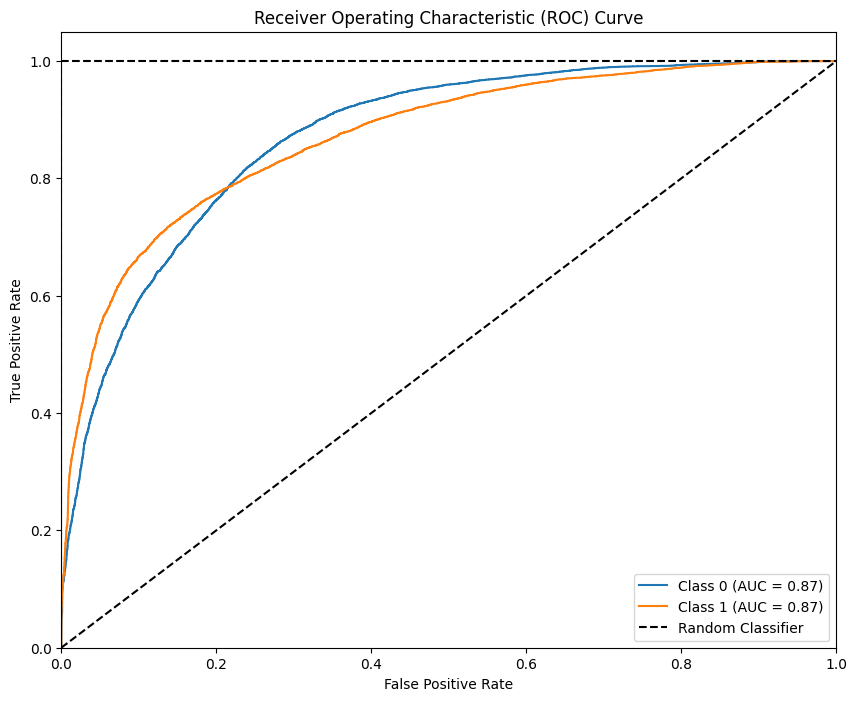

In [19]:
"""
inputs:
 - df
 - column being predicted (target_col)
 - other misc. columns left to be dropped (drop_columns)
 - number of classes (K) (K = 1 for regression)


outputs:
- negative_loss_member
- negative_loss_non_member
- confidence_score_member
- confidence_score_non_member
"""
negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member = seed_loop(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2)

# MIA
using negative loss and confidence score to calculate AUC and advantage (everything done in attack.py) (empirical_auc function is not used due to inefficiency)

In [20]:
# AUC using confidence score
auc = empirical_auc_sklearn(confidence_score_member, confidence_score_non_member)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.49902799999999997


In [21]:
# AUC using negative cross entropy loss
auc = empirical_auc_sklearn(negative_loss_member, negative_loss_non_member)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.49902799999999997


In [22]:
# Advantage for thresholds 0-10 in 0.1 intervals using negative cross entropy loss
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(negative_loss_member, negative_loss_non_member, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.0 for Threshold = 0.1
Advantage = 0.0 for Threshold = 0.2
Advantage = 0.0 for Threshold = 0.3
Advantage = 0.0 for Threshold = 0.4
Advantage = 0.0 for Threshold = 0.5
Advantage = 0.0 for Threshold = 0.6
Advantage = 0.0 for Threshold = 0.7
Advantage = 0.0 for Threshold = 0.8
Advantage = 0.0 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0


In [23]:
# Advantage for thresholds 0-10 in 0.1 intervals using confidence score
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(confidence_score_member, confidence_score_non_member, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.014000000000000012 for Threshold = 0.1
Advantage = 0.03400000000000003 for Threshold = 0.2
Advantage = 0.017999999999999905 for Threshold = 0.3
Advantage = 0.006000000000000005 for Threshold = 0.4
Advantage = -0.010000000000000009 for Threshold = 0.5
Advantage = 0.0040000000000000036 for Threshold = 0.6
Advantage = 0.026000000000000023 for Threshold = 0.7
Advantage = 0.016000000000000014 for Threshold = 0.8
Advantage = -0.035999999999999976 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0
